# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [66]:
# Load the breast cancer 
df = pd.read_csv("../breastcancer_raw.csv")
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [67]:
# Basic information about the dataset
print("\nBasic Information:")
df.info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

In [68]:
# Missing Values Analysis
print("\nTotal missing values per kolom:")
print(df.isna().sum())


Total missing values per kolom:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

In [69]:
# Statistical summary of the dataset
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


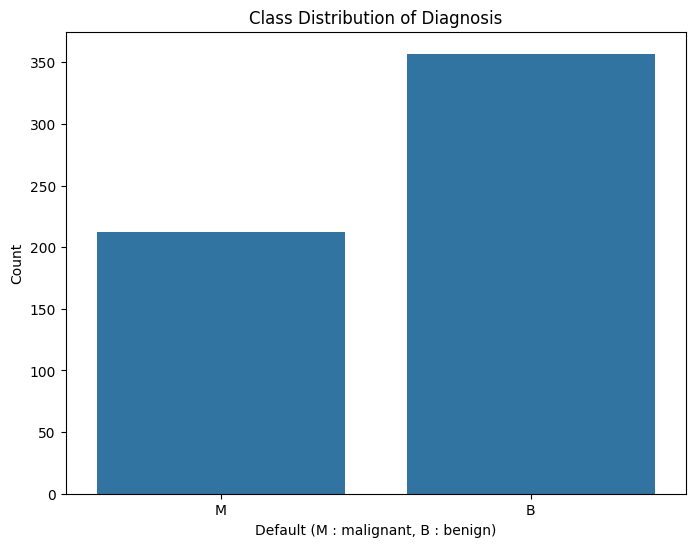


Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [70]:
# Understanding the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution of Diagnosis')
plt.xlabel('Default (M : malignant, B : benign)')
plt.ylabel('Count')
plt.show()
print("\nClass Distribution:")
print(df['diagnosis'].value_counts())

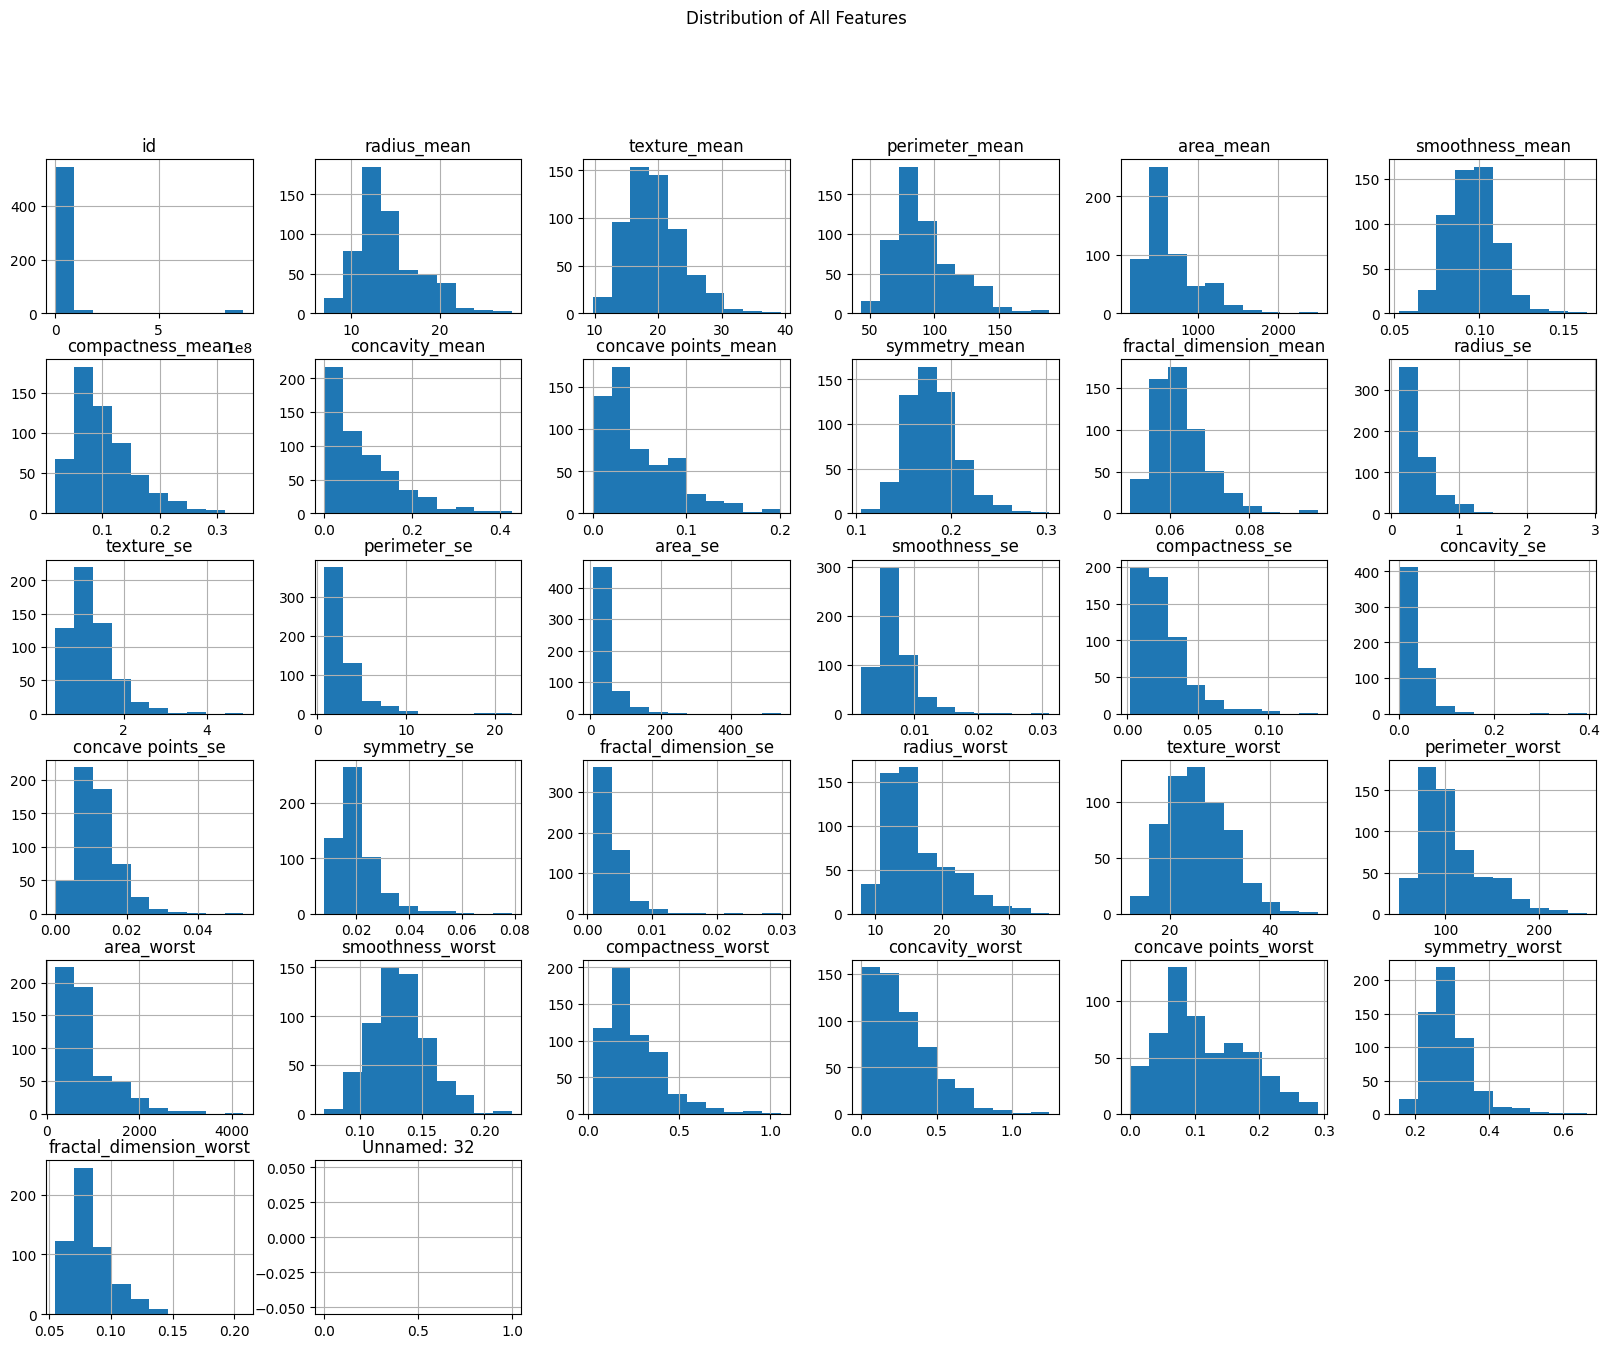

In [71]:
# Visualize distribution of all features
df.hist(figsize=(20, 15))
plt.suptitle('Distribution of All Features')
plt.show()

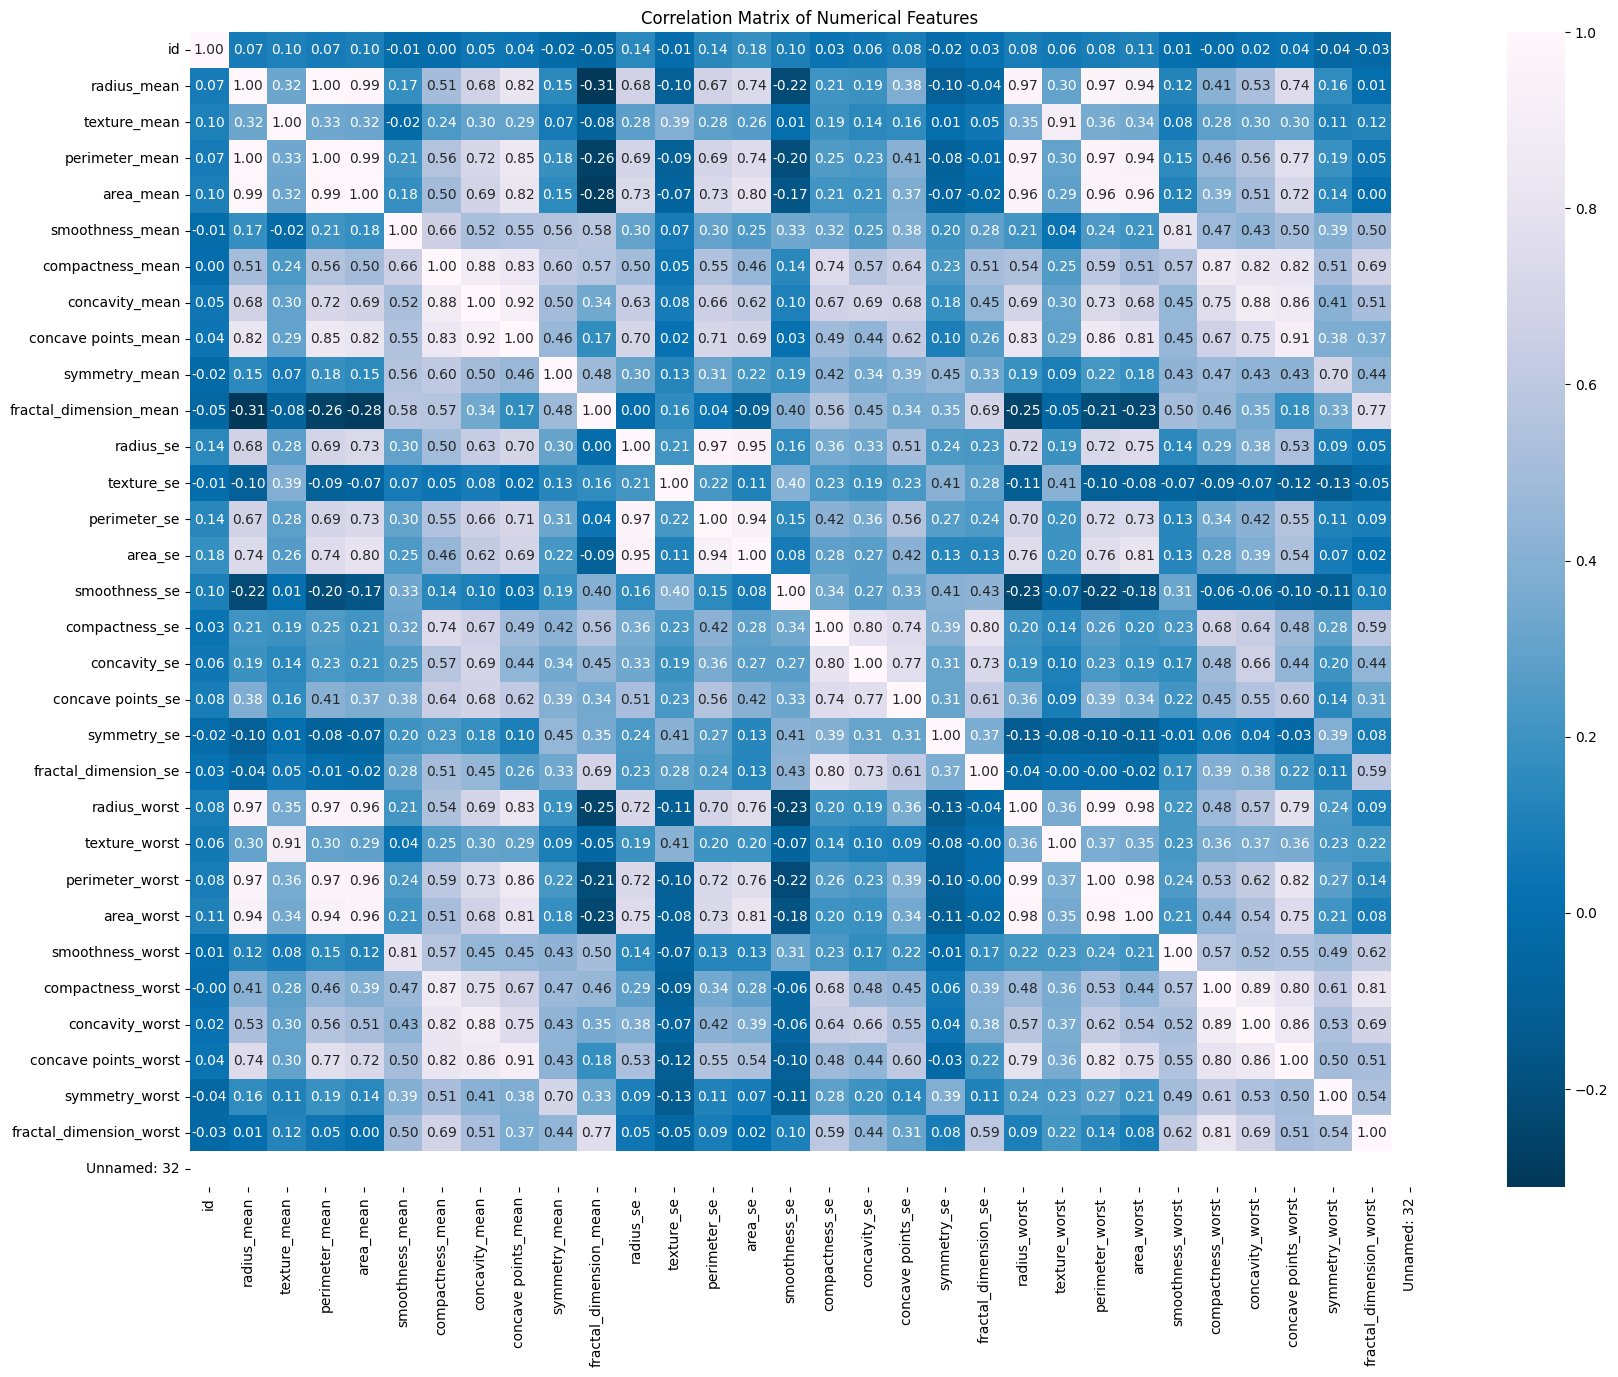

In [72]:
# Visualize correlation matrix for numerical features only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Visualize correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PuBu_r', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [73]:
# drop ID column because it is not needed for modeling
df = df.drop('id', axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [74]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [75]:
# Drop the 'Unnamed: 32' column if it exists
df = df.drop(columns=['Unnamed: 32'])

In [76]:
# Verify no missing values remain
print("\nMissing Values After Dropping:")
print(df.isnull().sum())


Missing Values After Dropping:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [77]:
# Check for duplicate data
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


Fitur numerik: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


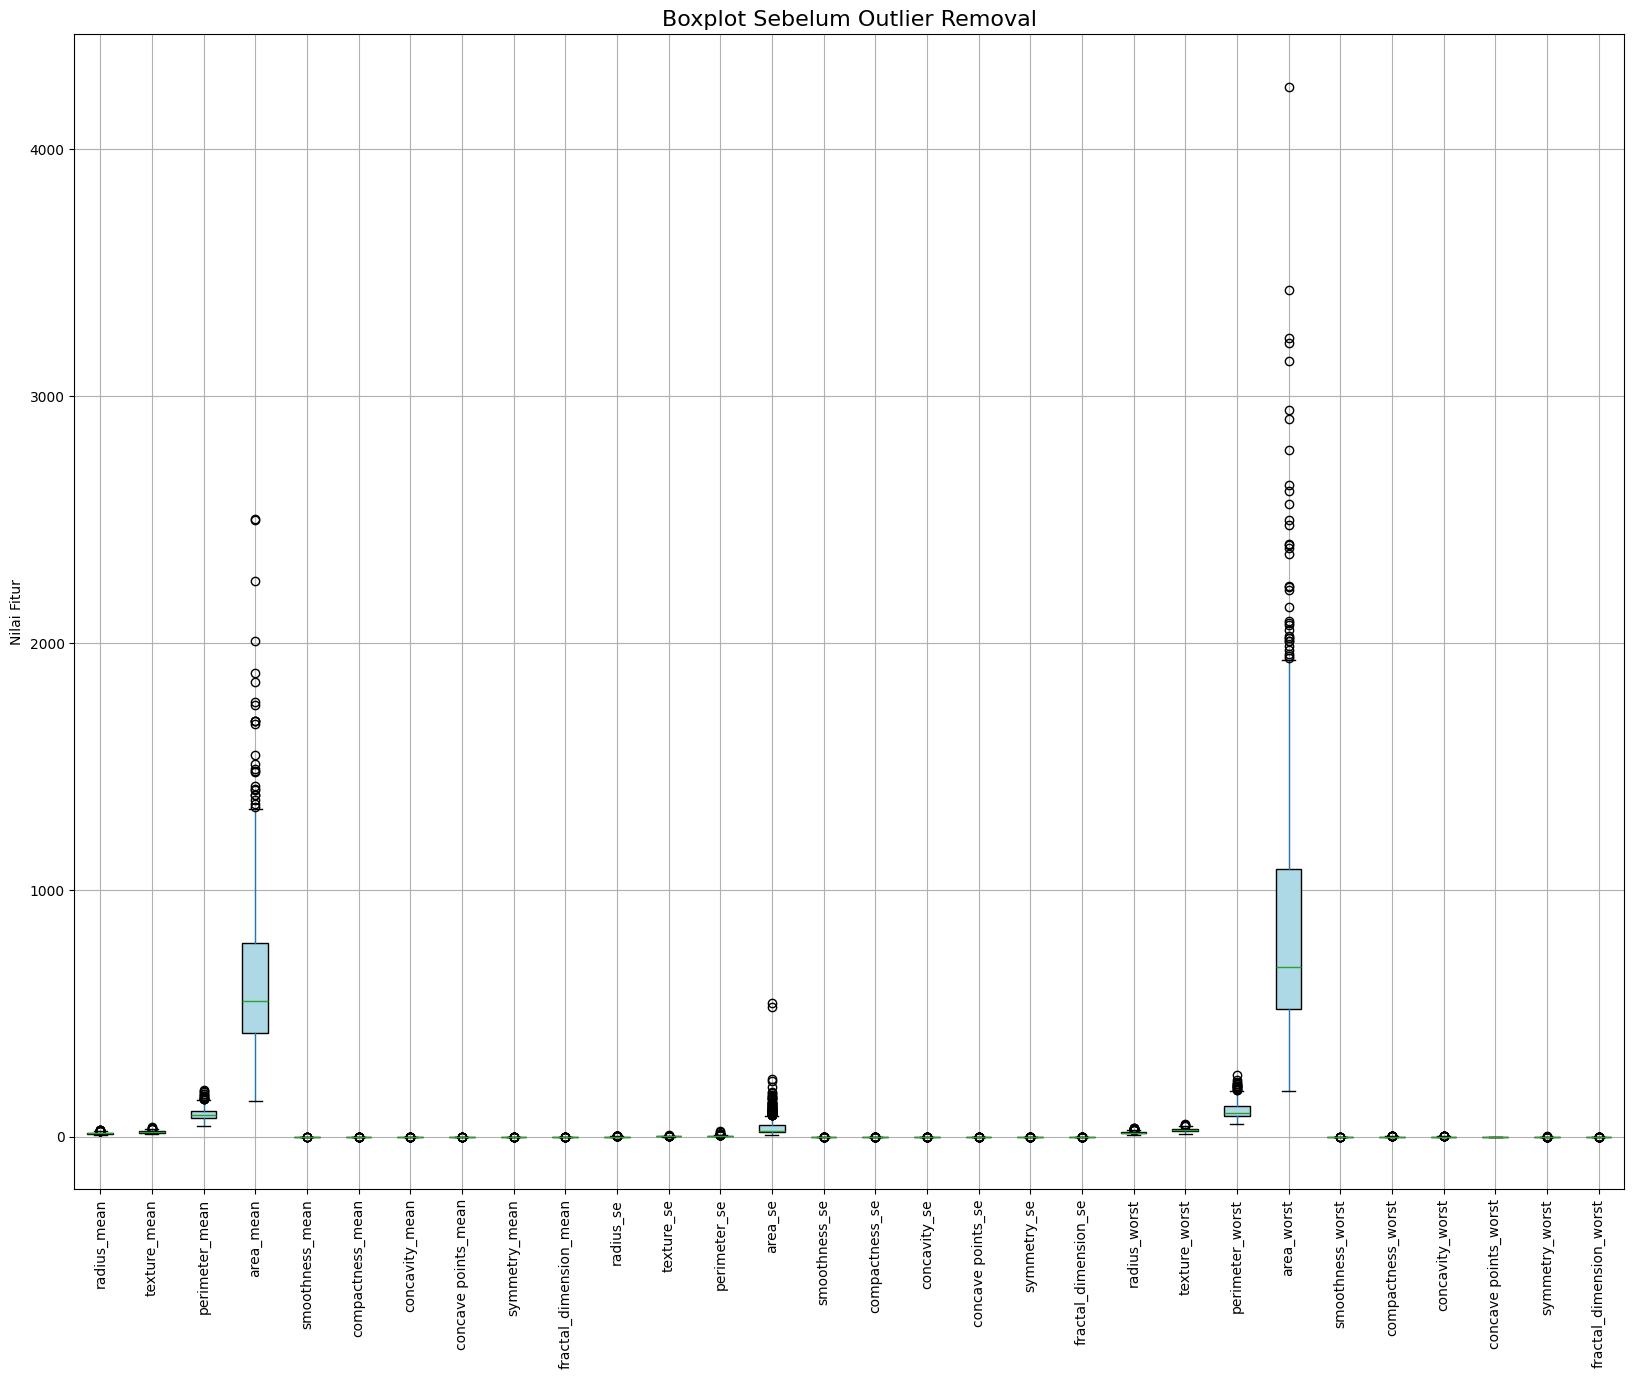

Jumlah data sebelum penghapusan outlier: 569
Jumlah data setelah penghapusan outlier: 398
Total data yang dihapus: 171


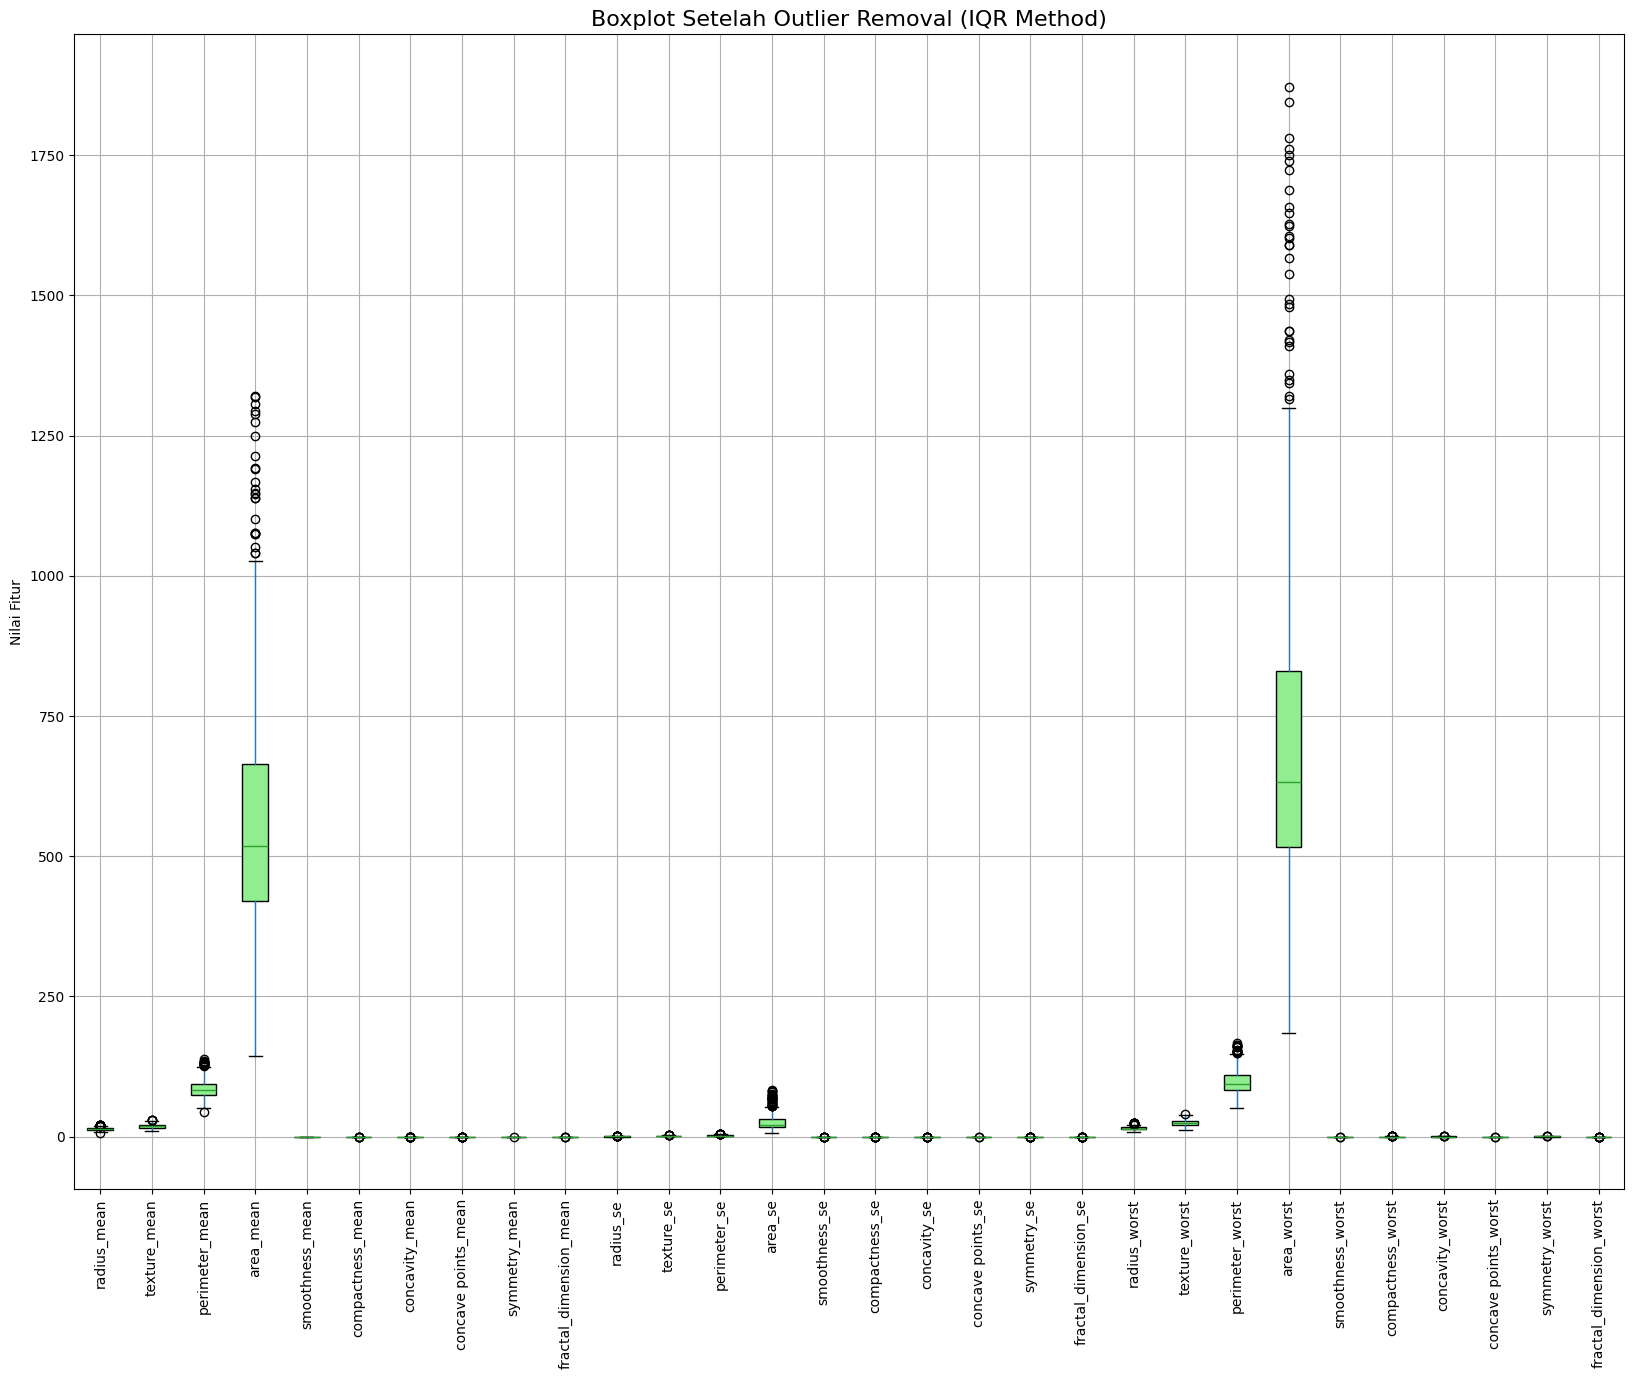

In [78]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Fitur numerik: {list(numeric_cols)}")

# Visualize distribution of all features before outlier removal
plt.figure(figsize=(20, 15))
df[numeric_cols].boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot Sebelum Outlier Removal', fontsize=16)
plt.ylabel('Nilai Fitur')
plt.show()

# Detect outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_iqr = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)].copy()

print(f"Jumlah data sebelum penghapusan outlier: {df.shape[0]}")
print(f"Jumlah data setelah penghapusan outlier: {df_iqr.shape[0]}")
print(f"Total data yang dihapus: {df.shape[0] - df_iqr.shape[0]}")

# Visualize distribution of all features after outlier removal
plt.figure(figsize=(20, 15))
df_iqr[numeric_cols].boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot Setelah Outlier Removal (IQR Method)', fontsize=16)
plt.ylabel('Nilai Fitur')
plt.show()

In [79]:
# Encoding categorical variables
df_iqr['diagnosis'] = df_iqr['diagnosis'].map({'M': 1, 'B': 0})
df_iqr.head()
df_iqr['diagnosis'].value_counts()
df_iqr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,1,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,1,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,1,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [80]:
# Split features and target variable
X = df_iqr.drop(columns=['diagnosis'])
y = df_iqr['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data Latih (X_train): {X_train.shape}")
print(f"Data Uji (X_test): {X_test.shape}")
print(f"Target Latih (y_train): {y_train.shape}")
print(f"Data Uji (y_test): {y_test.shape}")

Data Latih (X_train): (318, 30)
Data Uji (X_test): (80, 30)
Target Latih (y_train): (318,)
Data Uji (y_test): (80,)


In [81]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Convert scaled arrays back to DataFrames
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.243277,-0.702880,0.176508,0.142459,-1.118427,-0.835571,-0.788854,-0.353632,-0.691421,-1.039952,...,-0.060582,-0.926956,-0.099303,-0.127322,-1.278203,-0.999798,-1.009590,-0.278456,-1.537228,-0.990986
1,1.894830,0.102415,1.863968,1.975503,0.386696,0.771216,1.043014,1.693151,0.363074,-0.884882,...,2.038601,0.061489,1.858222,2.230651,0.728232,0.640053,1.149173,1.646275,0.083801,0.200663
2,-1.223458,2.295024,-1.210096,-1.100348,-0.218735,-0.238452,-0.011011,-0.320408,-0.672072,0.035598,...,-1.293436,1.783017,-1.288731,-1.108601,0.477427,-0.348929,-0.090426,-0.094735,-1.321410,0.268734
3,-0.480260,-0.155982,-0.507519,-0.534960,0.981981,-0.411234,-0.708724,-0.241982,0.812927,1.045541,...,-0.690640,-0.647273,-0.734165,-0.701043,-0.746498,-1.076061,-1.095218,-0.749151,-1.319012,-0.457627
4,-0.802705,-0.223717,-0.814751,-0.758587,-0.364174,-0.912619,-0.650465,-0.566887,-0.633375,-0.389851,...,-0.624000,2.027957,-0.604898,-0.623737,0.823537,-0.431579,-0.216861,-0.181251,0.469874,-0.162117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,-1.778694,-0.745528,-1.727753,-1.450828,-0.841924,-0.226952,-0.265122,-0.458328,0.958041,1.017708,...,-1.553638,-1.206640,-1.478439,-1.273283,-1.373508,-0.782841,-0.796791,-0.975021,-0.822632,-0.413581
314,0.648301,0.152589,0.621126,0.558327,-0.062304,0.031502,0.284657,0.296563,-0.826860,-0.385874,...,0.748194,0.593061,0.662618,0.696384,-0.214793,0.018300,0.488901,0.323325,-1.187124,-0.795581
315,0.612911,0.160115,0.607793,0.494683,-0.250867,0.383966,-0.022742,0.483548,0.711347,-0.511123,...,0.345320,0.268211,0.455263,0.230772,0.121285,0.890821,-0.221544,1.067484,0.443496,0.420093
316,0.180361,-0.384274,0.255925,0.022146,0.821322,1.921180,0.764844,0.786045,1.809376,1.604190,...,0.193864,0.396761,0.247907,0.053947,0.858650,2.149355,1.672976,1.400238,2.045341,2.116271


In [83]:
# Final check
print("Train shape:", X_train_df.shape)
print("Test shape :", X_test_df.shape)

Train shape: (318, 30)
Test shape : (80, 30)


In [84]:
from pathlib import Path

# Option A: jika working dir sudah berada di folder "Membangun Model", gunakan relatif
save_path = Path.cwd() / "breastcancer_preprocessing"

print("Working dir:", Path.cwd().resolve())
print("Using target folder:", save_path.resolve())

if not save_path.exists():
    raise FileNotFoundError(
        f"Target folder tidak ditemukan: {save_path.resolve()}\n"
        "Pastikan folder ada atau perbaiki path (script TIDAK akan membuat folder baru)."
    )

# simpan file
X_train_df.to_csv(save_path / "X_train.csv", index=False)
X_test_df.to_csv(save_path / "X_test.csv", index=False)
y_train.to_csv(save_path / "y_train.csv", index=False)
y_test.to_csv(save_path / "y_test.csv", index=False)

print("Files saved to:", save_path.resolve())
print([p.name for p in save_path.iterdir() if p.is_file()])


Working dir: C:\SMSML_Richelle Vania Thionanda\Preprocessing
Using target folder: C:\SMSML_Richelle Vania Thionanda\Preprocessing\breastcancer_preprocessing
Files saved to: C:\SMSML_Richelle Vania Thionanda\Preprocessing\breastcancer_preprocessing
['X_test.csv', 'X_train.csv', 'y_test.csv', 'y_train.csv']
